In [1]:
import os, cv2
import pandas as pd

In [2]:
base_path = './data/'

family_id = 0
id = 0
columns = ['id', 'familyId', 'familyName', 'file', 'path', 'height', 'width']
temp_data = []
for folder in os.listdir(base_path):
  if ('.txt' in folder): continue

  count = 0
  full_path = base_path + folder + '/'
  for file in os.listdir(full_path):
    full_file_path = full_path + file
    img = cv2.imread(full_file_path, cv2.IMREAD_UNCHANGED)
    height, width = img.shape
    temp_data.append([id, family_id, folder, file, full_file_path, height, width])
    count += 1
    id += 1

  print(family_id, 'Family:', folder, '\t\tExamples', count)
  family_id += 1
data = pd.DataFrame(data=temp_data, columns=columns)

0 Family: Adialer.C 		Examples 122
1 Family: Agent.FYI 		Examples 116
2 Family: Allaple.A 		Examples 2949
3 Family: Allaple.L 		Examples 1591
4 Family: Alueron.gen!J 		Examples 198
5 Family: Autorun.K 		Examples 106
6 Family: C2LOP.gen!g 		Examples 200
7 Family: C2LOP.P 		Examples 146
8 Family: Dialplatform.B 		Examples 177
9 Family: Dontovo.A 		Examples 162
10 Family: Fakerean 		Examples 381
11 Family: Instantaccess 		Examples 431
12 Family: Lolyda.AA1 		Examples 213
13 Family: Lolyda.AA2 		Examples 184
14 Family: Lolyda.AA3 		Examples 123
15 Family: Lolyda.AT 		Examples 159
16 Family: Malex.gen!J 		Examples 136
17 Family: Obfuscator.AD 		Examples 142
18 Family: Rbot!gen 		Examples 158
19 Family: Skintrim.N 		Examples 80
20 Family: Swizzor.gen!E 		Examples 128
21 Family: Swizzor.gen!I 		Examples 132
22 Family: VB.AT 		Examples 408
23 Family: Wintrim.BX 		Examples 97
24 Family: Yuner.A 		Examples 800


# Decisiones de la data

Debido a que hay familias que cuentan con pocos ejemplaros y otras que cuentan con muchas, se obtendra una muestra de las familias:
- Allaple.A
- Allaple.L
- Yuner.A 

## Allaple.A

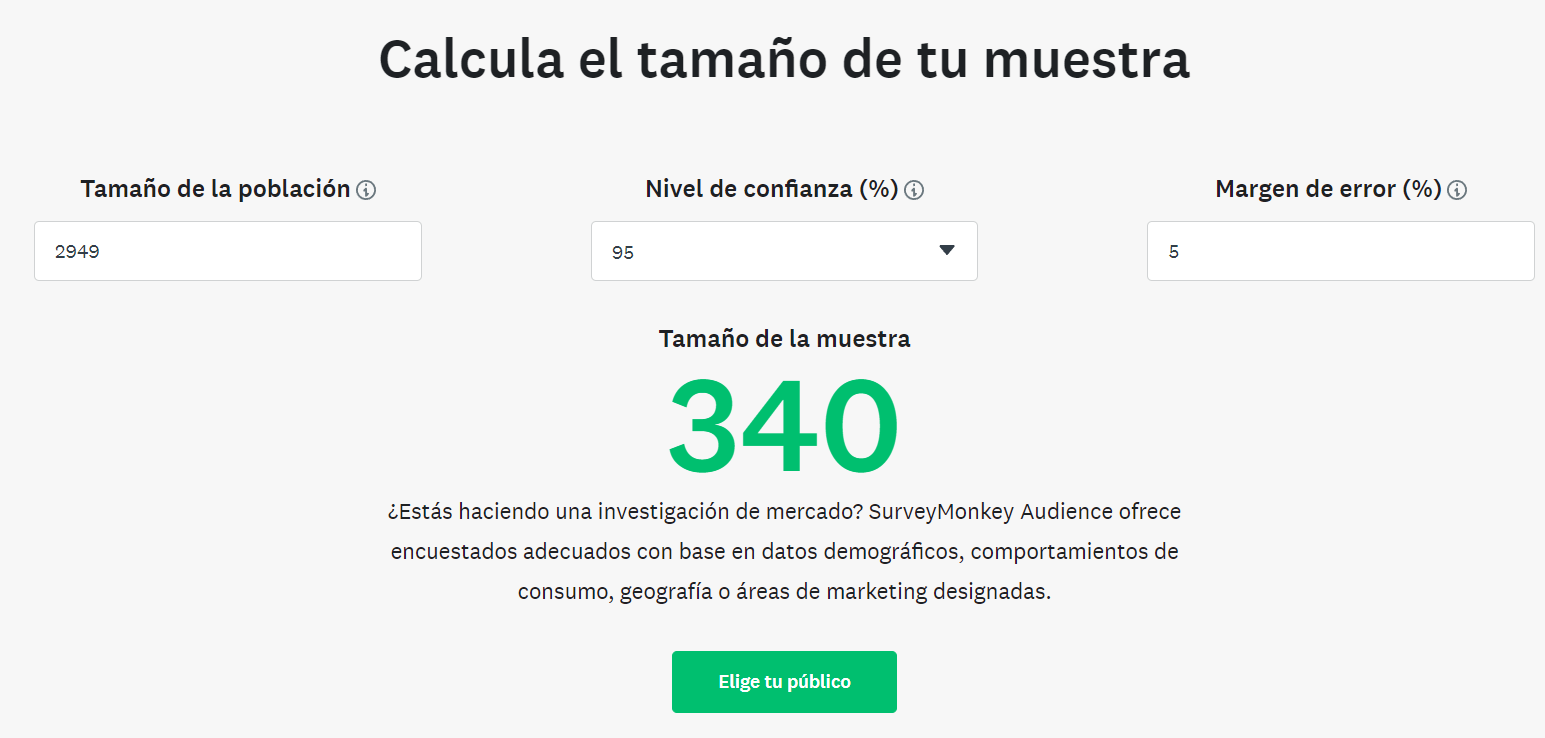

## Allaple.L

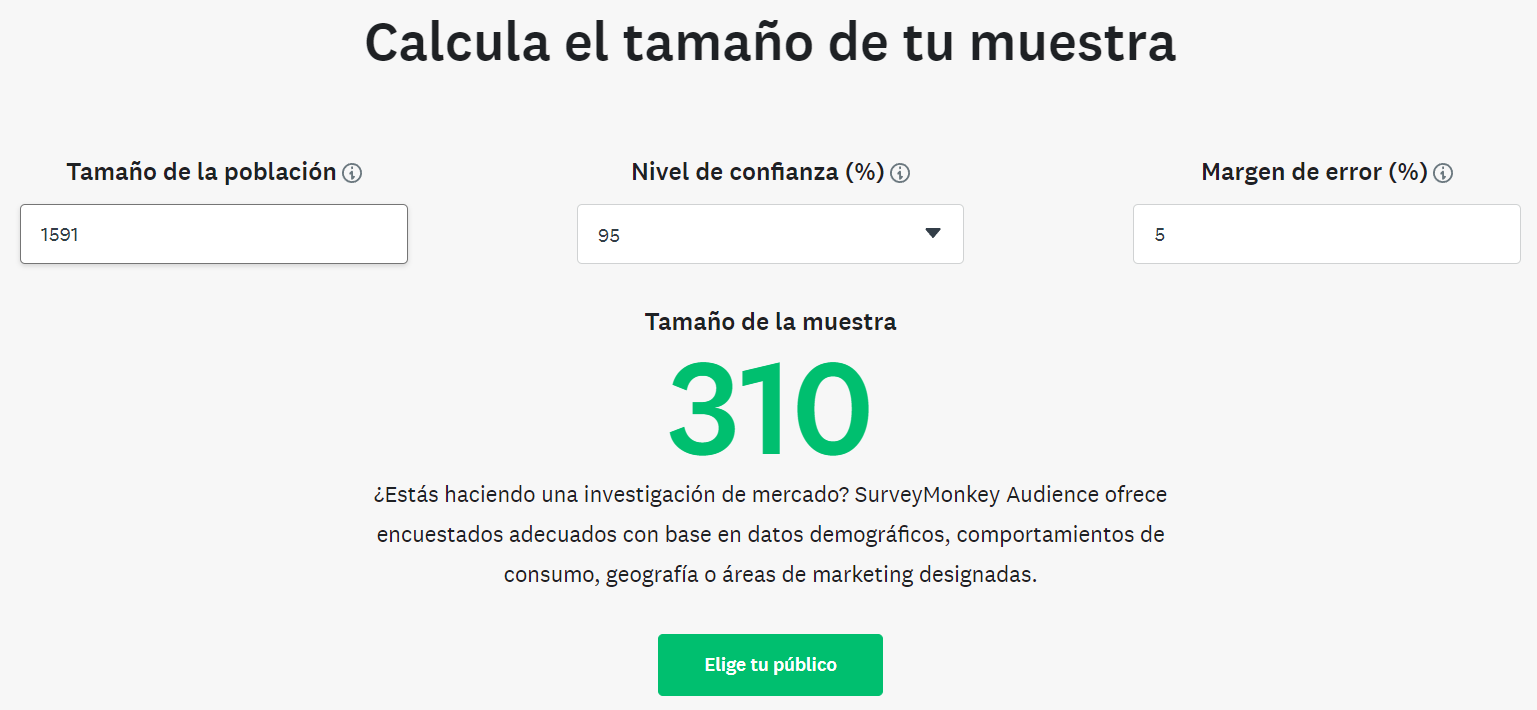

## Yuner.A

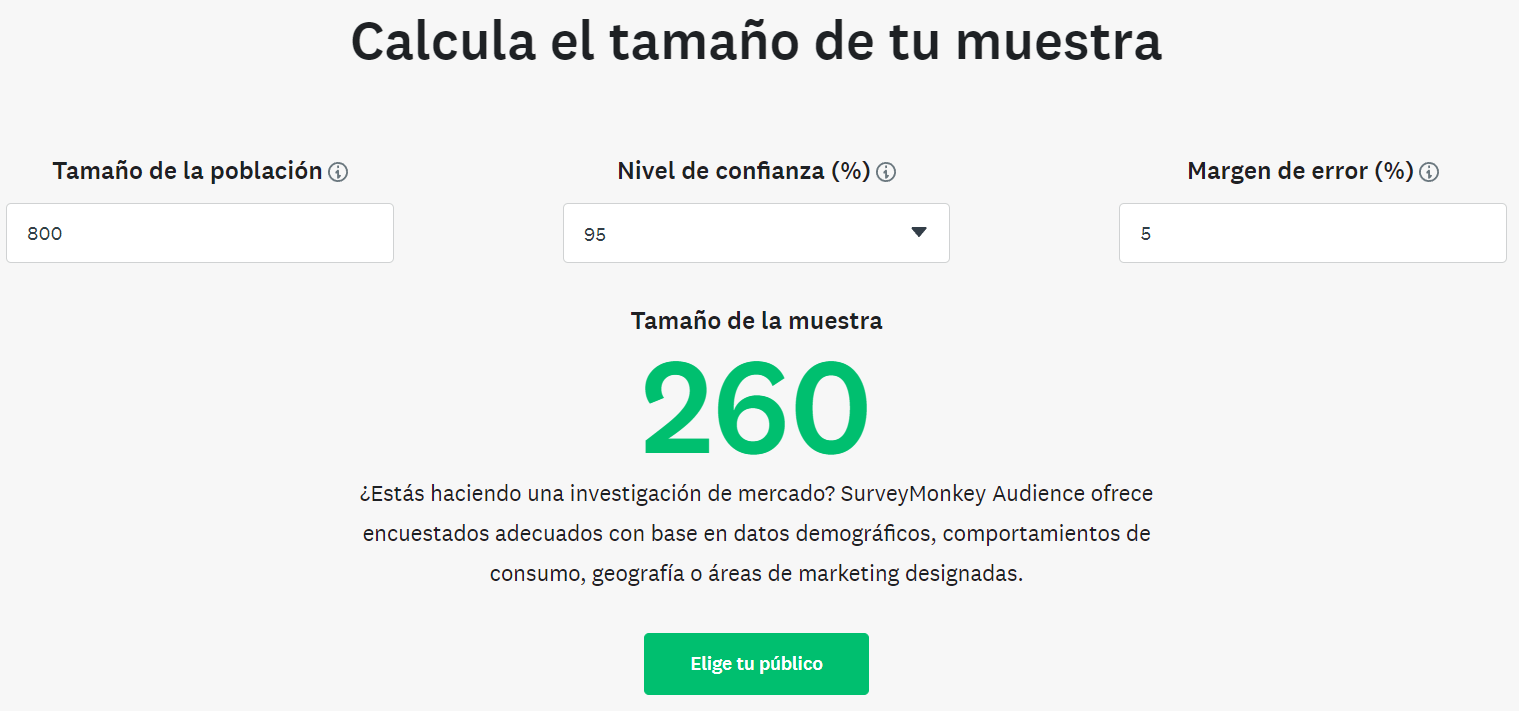

# Limpiando data

In [3]:
df = pd.DataFrame(columns=columns)
for i in range(0, 26):
  temp_data = data[data['familyId'] == i]

  if (i == 2):
    temp_data = temp_data.sample(340)
  elif (i == 3):
    temp_data = temp_data.sample(310)
  elif (i == 24):
    temp_data = temp_data.sample(260)

  df = pd.concat([df, temp_data])

len(df['familyId'].value_counts())

25

In [4]:
df.to_csv('./data.csv', index=False, encoding='utf8')